<a href="https://colab.research.google.com/github/NastasiaMazur/VU_1_1/blob/main/tutorials/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3: Introduction to Computational Linguistics

This is the second tutorial with practical exercises for the lecture Introduction to Computational Linguistics in the winter semester 2023. Hands-on exercises are marked with 👋 ⚒ and questions are marked with ❓. Remember to first **store this notebook** in your Drive or GitHub.

---

## **Lesson 3: Word Embeddings**

A vector representation of words trained with a neural network is called a word embedding. The most popular method for training embeddings is called word2vec, which is an unsupervised method of training embeddings from large natural language corpora.


`word2vec` literature:
  - Mikolov, T.,  Chen, K., Corrado, G., & Dean, J. (2013). [Efficient estimation of word representations in vector space](https://arxiv.org/abs/1301.3781). Corr abs/1301.3781.
  - Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013). [Distributed representations of words and phrases and their compositionally](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf). *Advances in neural information processing systems*. 2013.


- Other variants of embeddings training:
  - `fasttext` from Facebook
  - `GloVe` from Stanford NLP Group
- There are many ways to train work embeddings.
  - `gensim`: Simplest and straightforward implementation of `word2vec`.
  - Training based on deep learning packages (e.g., `keras`, `tensorflow`)
  - `spacy` (It comes with the pre-trained embeddings models, using GloVe.)
- See Sarkar (2019), Chapter 4, for more comprehensive reviews.

If we assume our training corpus contains 10,000 unique words, our input vector to the model to train embeddings with skipgram has 10,000 dimensions, one for each word in the vocabulary.

In the input vector all dimensions are zero but one, which indicates the word in the vocabulary, e.g. "ant" in the example below. This is why these vectors are called one-hot encodings.


Source of the following image: [Chris McCormik Tutorial](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)




![architecture](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

When multiplying a matrix on the hidden layer with the one-hot encoding, we obtain one row of the matrix. So the matrix serves as a lookup table for embeddings.

![matrix_mult](http://mccormickml.com/assets/word2vec/matrix_mult_w_one_hot.png)

The output layer is a softmax regression classifier, which changes the rates of the weights into a range between 0 and 1, where the sum of all dimensions add up to 1. The final output layer indicates the probabilty of context words for the input, e.g. how high is the probability of "ability" occuring near to "ant".

Since learning embeddings based on all context words anywhere near a word in a text is inefficient, a window size is selected to limit the number of context words that are considered during training:

![word2vec_skipgrams](https://tensorflow.org/text/tutorials/images/word2vec_skipgram.png)

### Using Pre-Trained Embeddings

The code below exemplifies how to load a trained embedding model in the gensim library.

In [45]:
# Let's first load a small subset of word2vec embeddings that have been trained on a
# large corpus of news documents
!wget https://github.com/dgromann/SemanticComputing/raw/master/tutorial6/word2vec_embeddings.bin
!wget https://raw.githubusercontent.com/dgromann/cl_intro/master/tutorials/Tutorial3.txt
!pip3 install gensim

--2023-12-03 12:41:17--  https://github.com/dgromann/SemanticComputing/raw/master/tutorial6/word2vec_embeddings.bin
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dgromann/SemanticComputing/master/tutorial6/word2vec_embeddings.bin [following]
--2023-12-03 12:41:18--  https://raw.githubusercontent.com/dgromann/SemanticComputing/master/tutorial6/word2vec_embeddings.bin
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96769269 (92M) [application/octet-stream]
Saving to: ‘word2vec_embeddings.bin.2’

word2vec_embeddings 100%[===================>]  92.29M   298MB/s    in 0.3s    

2023-12-03 12:41:20 

In [46]:
import gensim
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Let's load the model
model = gensim.models.KeyedVectors.load_word2vec_format("word2vec_embeddings.bin.2", binary=True)

In [47]:
# Print the length fo the whole vocabulary
print("Length of the vocabulary",len(model.key_to_index))

# Print the embedding of a specific word
print("Embedding for the word good: ", model["good"])

Length of the vocabulary 80000
Embedding for the word good:  [ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.1542

👋 ⚒ How many dimensions (numbers) does each vector in this trained embedding model have? Try to find this out with code, not by counting.

In [48]:
#Your code goes here
embedding_for_good = model["good"]

dimensions = embedding_for_good.shape     # Checks the shape of the embedding
print("Number of dimensions:", dimensions)    # each vector in the word2vec embedding model has 300 dimensions

# the comma is there to denote that it's a tuple with a single element.

Number of dimensions: (300,)


Let's use embeddings to evaluate how similar two words are.

👋 ⚒ How can we get the first most similiar word of good from the list of the top 5 most similar words?

In [49]:
print(model.most_similar('good'))

# Get the top 5 most similar words of "good"
most_similar = model.most_similar("good", topn=5)
print(most_similar)

# Your code to get the first word from that list of top 5
first_most_similar_word = most_similar[0][0]
print("First most similar word to 'good':", first_most_similar_word)


[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728850364685), ('solid', 0.5806034803390503), ('lousy', 0.576420247554779)]
[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348341941833), ('nice', 0.6836092472076416)]
First most similar word to 'good': great


We can also use these embeddings to obtain similar words in other pairs with the analogy task a is to b as c is to d, e.g. *man is to woman as king is to ?*

In [50]:
# Check whether our embeddings are good at the analogy task
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


👋 ⚒ How can we get the first most similiar word of good from the list of the top 5 most similar words?

In [51]:
def analogy(a, b, c, model, topn=1):
  #Your code goes here
  result = model.most_similar(positive=[c, b], negative=[a], topn=topn)

  result_word = result[0][0]

  return result_word

print(analogy("France", "Paris", "Austria", model))
print(analogy("good", "best", "bad", model))

Vienna
worst


We can use matplotlib to visualize the proximity of words in vector space.

In [52]:
def display_pca_scatterplot(model, words):

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

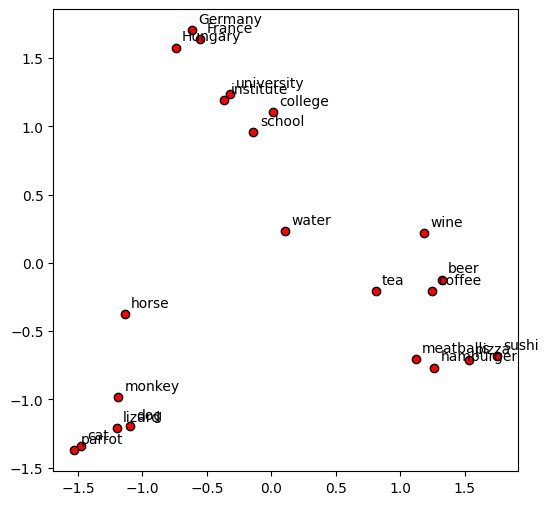

In [53]:
display_pca_scatterplot(model,
                        ['coffee', 'tea', 'beer', 'wine', 'water',
                         'hamburger', 'pizza',  'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'lizard',
                         'France', 'Germany', 'Hungary',
                         'school', 'college', 'university', 'institute'])

👋 ⚒ Write a function that runs through the text file analogy.txt and test your analogy function on each line apart from the header.

In [59]:
#analogy_file = open("Tutorial3.txt", "r")

# Your code here
def test_analogies(model, analogy_file):
    with open(analogy_file, 'r') as file:
        lines = file.readlines()

    for line in lines[1:]:  # Skip the header, start from the second line
        words = line.strip().split()
        if len(words) == 4:  # Check if the line has the expected format (four words)
            a, b, c, expected = words
            result = analogy(a, b, c, model)
            print(f"Analogy: {a}:{b} :: {c}:{result}  Expected: {expected}")

# Test the analogies using the provided analogy file
test_analogies(model, 'Tutorial3.txt')


Streaming output truncated to the last 5000 lines.
Analogy: short:shorter :: simple:simpler  Expected: simpler
Analogy: short:shorter :: slow:slower  Expected: slower
Analogy: short:shorter :: small:smaller  Expected: smaller
Analogy: short:shorter :: smart:smarter  Expected: smarter
Analogy: short:shorter :: strong:stronger  Expected: stronger
Analogy: short:shorter :: tall:taller  Expected: taller
Analogy: short:shorter :: tight:tighter  Expected: tighter
Analogy: short:shorter :: tough:tougher  Expected: tougher
Analogy: short:shorter :: warm:warmer  Expected: warmer
Analogy: short:shorter :: weak:weaker  Expected: weaker
Analogy: short:shorter :: wide:wider  Expected: wider
Analogy: short:shorter :: young:younger  Expected: younger
Analogy: short:shorter :: bad:better  Expected: worse
Analogy: short:shorter :: big:bigger  Expected: bigger
Analogy: short:shorter :: bright:brighter  Expected: brighter
Analogy: short:shorter :: cheap:cheaper  Expected: cheaper
Analogy: short:shorter :